#### KNN Classification in Python - Loading and Exploring the Dataset

In [4]:
# Loading the packages
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
digitos = datasets.load_digits()

In [6]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

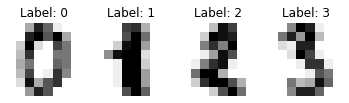

In [6]:
# Viewing some images and labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Label: %i' % label)

In [7]:
# Generating X and Y
X = digitos.data
Y = digitos.target

In [8]:
# X and Y format
print(X.shape, Y.shape)

(1797, 64) (1797,)


#### KNN Classification in Python - Pre-Processing and Normalization

In [9]:
# Splitting into training and test data
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [10]:
# Splitting training data into training data and validation data
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino,
                                                                   Y_treino,
                                                                   test_size = 0.1,
                                                                   random_state = 84)

In [11]:
# Printing the number of examples (notes) in each dataset
print('Exemplos de Treino: {}'.format(len(treinoLabels)))
print('Exemplos de Validacao: {}'.format(len(validLabels)))
print('Exemplos de Teste: {}'.format(len(testeLabels)))

Exemplos de Treino: 1131
Exemplos de Validacao: 126
Exemplos de Teste: 540


In [12]:
# Normalization of data by Mean

# Calculation of the average of the training dataset
X_norm = np.mean(X, axis = 0)

# Normalization of training and test data
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

In [13]:
# Datasets shape
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


#### KNN Classification in Python - Testing the Best K Value

In [14]:
# Range of k values that we will test
kVals = range(1, 100, 2)

In [15]:
# Empty list to receive accuracies
acuracias = []

In [16]:
# Loop through all K values to test each one
for k in kVals:
    
    # training the KNN model with each K value
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
    
    # Evaluating the model and updating the list of accuracies
    score = modeloKNN.score(validData, validLabels)
    print('Com o valor de k = %d, a acuracia e = %.2f%%' % (k, score * 100))
    acuracias.append(score)

Com o valor de k = 1, a acuracia e = 99.21%
Com o valor de k = 3, a acuracia e = 100.00%
Com o valor de k = 5, a acuracia e = 100.00%
Com o valor de k = 7, a acuracia e = 99.21%
Com o valor de k = 9, a acuracia e = 98.41%
Com o valor de k = 11, a acuracia e = 98.41%
Com o valor de k = 13, a acuracia e = 97.62%
Com o valor de k = 15, a acuracia e = 97.62%
Com o valor de k = 17, a acuracia e = 97.62%
Com o valor de k = 19, a acuracia e = 97.62%
Com o valor de k = 21, a acuracia e = 97.62%
Com o valor de k = 23, a acuracia e = 97.62%
Com o valor de k = 25, a acuracia e = 96.83%
Com o valor de k = 27, a acuracia e = 96.83%
Com o valor de k = 29, a acuracia e = 96.83%
Com o valor de k = 31, a acuracia e = 96.83%
Com o valor de k = 33, a acuracia e = 96.03%
Com o valor de k = 35, a acuracia e = 96.03%
Com o valor de k = 37, a acuracia e = 96.03%
Com o valor de k = 39, a acuracia e = 96.03%
Com o valor de k = 41, a acuracia e = 96.03%
Com o valor de k = 43, a acuracia e = 95.24%
Com o valor d

In [17]:
# Obtaining the K value that presented the highest accuracy
i = np.argmax(acuracias)
print('O valor de k = %d, alcancou a mais alta acuracia de %.3f%% nos dados de validacao!' % (kVals[i], acuracias[i] * 100))

O valor de k = 3, alcancou a mais alta acuracia de 100.000% nos dados de validacao!


#### KNN Classification in Python - KNN Model Building and Training

In [18]:
# Creating the final version of the model with the highest K value
modeloFinal = KNeighborsClassifier(n_neighbors=kVals[i])

In [19]:
# Model training
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### KNN Classification in Python - Predictions with Test Data and Model Evaluation

In [20]:
# Predictions with test data
predictions = modeloFinal.predict(testeData)

In [21]:
# Model performance on test data
print('Avaliacao do modelo nos dados de teste')
print(classification_report(testeLabels, predictions))

Avaliacao do modelo nos dados de teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.98      1.00      0.99        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [22]:
# Confusion Matrix
print('Confusion Matrix')
confusion_matrix(testeLabels, predictions)

Confusion Matrix


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]], dtype=int64)

Eu acredito que esse digito seja: 4


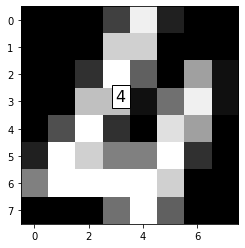

Eu acredito que esse digito seja: 3


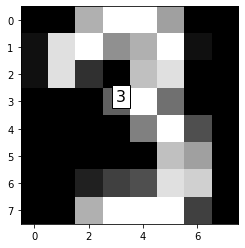

Eu acredito que esse digito seja: 5


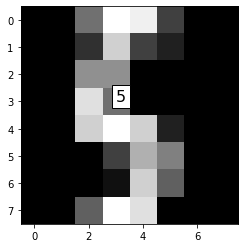

Eu acredito que esse digito seja: 2


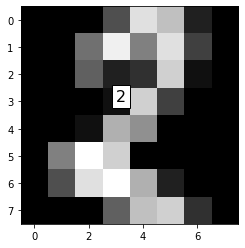

Eu acredito que esse digito seja: 4


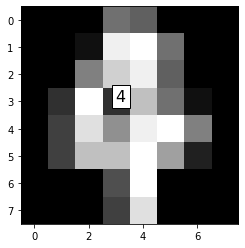

In [23]:
# Making predictions with the trained model using test data
for i in np.random.randint(0, high=len(testeLabels), size = (5,)):
    
    # get an image and make the prediction
    image = testeData[i]
    prediction = modeloFinal.predict([image])[0]
    
    # return the predictions
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(prediction, [3,3],bbox={'facecolor':'white'}, fontsize=16)
    print('Eu acredito que esse digito seja: {}'.format(prediction))
    plt.show()

#### KNN Classification in Python - Predictions on New Data with the Trained Model

In [24]:
# Defining a new input data
novoDigito = [5.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  9.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  5.]

In [25]:
# Normalizing the new data
novoDigito_norm = novoDigito - X_norm

In [26]:
# Making the prediction with the trained model
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [6]


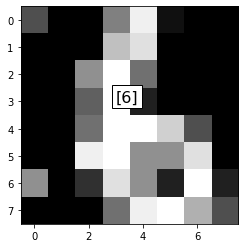

In [27]:
# Model Predictions
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()

In [28]:
# Testing the trained model with a new digit (input data)
novoDigito = [5.,  0.,  0.,  1., 11.,  9.,  0.,  1.,  0.,  0.,  12.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  5.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  13.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  5.]

In [29]:
# Normalizing the new digit
novoDigito_norm = novoDigito - X_norm

In [30]:
# Making the prediction with the trained model
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [1]


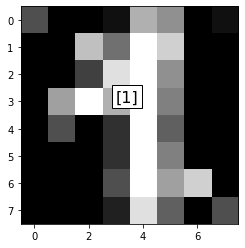

In [31]:
# Model prediction
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()